## Classification

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target.shape

(150,)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


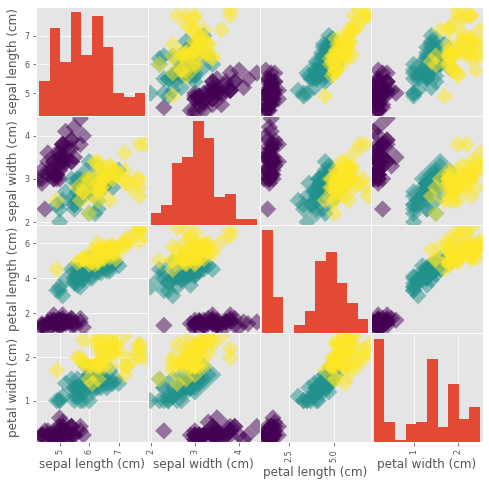

In [10]:
pd.plotting.scatter_matrix(df, c=y, figsize = [8,8], s=150, marker='D');

### KNeighborsClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [12]:
print("X: {}".format(iris['data'].shape))
print("y: {}".format(iris['target'].shape))

X: (150, 4)
y: (150,)


In [14]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],[5.7, 2.6, 3.8, 1.3],[4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_new)
print(prediction)
#predict the species for the new data(3), they are classified as versicolor, versicolor, setosa (1 for versicolor, 0 for setosa)

[1 1 0]


### Measure the model accuracy: knn.score()

In [16]:
from sklearn.model_selection import train_test_split
#train_test_split(X=feature data, y=target, porportion of data for test set, set a seed for random number, stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [17]:
# smaller n_neighbors: overfitting; largerer n_neighbors: underfitting
knn.score(X_test, y_test)

0.9555555555555556

### Overfitting or underfitting
- picking n_neighbors

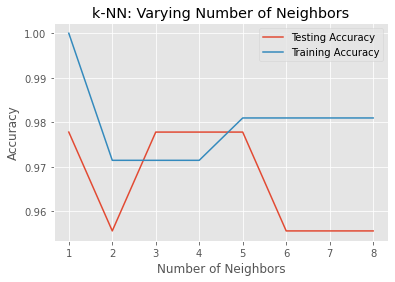

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Great work! It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!

## Regression

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [22]:
X = np.array(X)
y = np.array(y) 

In [23]:
type(X[:,5]), type(y)

(numpy.ndarray, numpy.ndarray)

In [24]:
X_rooms = X[:,5]
y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

### (1) Linear Regression

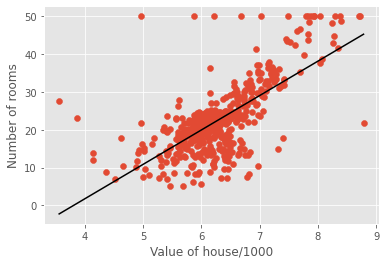

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)


plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color='black')
plt.xlabel('Value of house/1000')
plt.ylabel('Number of rooms');

In [26]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2
print("R^2: {}".format(reg_all.score(X_test, y_test)))

# RMSE, which is another commonly used metric to evaluate regression models.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.711226005748496
Root Mean Squared Error: 4.638689926172797


### Cross-validation (k-fold CV)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
print(np.mean(cv_results))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958772


### Regularize regression  (2) Ridge regression
- Ridge regression should be your first choice.
<br>
- picking alpha, which controls model complexity
<br>
- low alpha: overfitting
<br>
- high alpha: penalize large coefficients -> simplify model -> underfitting

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

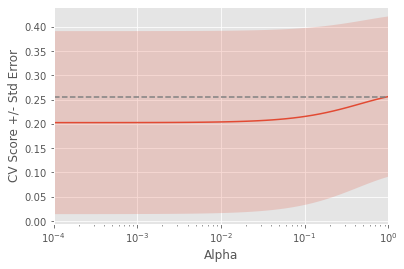

In [35]:
# Setup the array of alphas and lists to store scores
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(alpha=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

display_plot(ridge_scores, ridge_scores_std)

### Regularize regression  (3) Lasso regression
shrink the small coefficients to 0

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

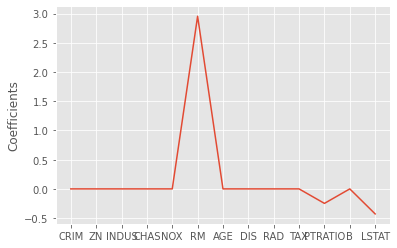

In [37]:
lasso_coef = lasso.fit(X, y).coef_
plt.plot(range(len(boston.feature_names)), lasso_coef)
plt.xticks(range(len(boston.feature_names)), boston.feature_names)
plt.ylabel('Coefficients');